# D. Time-series analysis

In [1]:
# Usual import commands and reading of the dataset as processed by task A.
import numpy as np
import pandas as pd

df = pd.read_csv('task A.csv', index_col=0)
df

,code,creator,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-uk_100g
0,4559,usda-ndb-import,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,United States,"peanuts, wheat flour, sugar, rice flour, tapio...",17.86,60.71,17.86,0.0
1,16087,usda-ndb-import,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,United States,"organic hazelnuts, organic cashews, organic wa...",57.14,17.86,17.86,12.0
2,16124,usda-ndb-import,2017-03-09T10:35:11Z,2017-03-09T10:35:12Z,Organic Muesli,Daddy's Muesli,United States,"org oats, org hemp granola (org oats, evaporat...",18.75,57.81,14.06,7.0
3,16872,usda-ndb-import,2017-03-09T10:34:10Z,2017-03-09T10:34:11Z,Zen Party Mix,Sunridge,United States,"roasted peanuts (peanuts, peanut or canola oil...",36.67,36.67,16.67,12.0
4,18012,usda-ndb-import,2017-03-09T10:34:12Z,2017-03-09T10:34:13Z,Cinnamon Nut Granola,Grizzlies,United States,"organic rolled oats, honey, raisins, almonds, ...",18.18,60.00,14.55,0.0
5,18050,usda-ndb-import,2017-03-09T09:07:42Z,2017-03-09T09:07:42Z,Organic Hazelnuts,Grizzlies,United States,organic raw hazelnuts,60.71,17.86,14.29,0.0
6,18265,usda-ndb-import,2017-03-09T10:35:06Z,2017-03-09T10:35:06Z,Energy Power Mix,Sunridge,United States,"yogurt raisins, tamari roasted almonds, organi...",17.50,42.50,7.50,14.0
7,18289,usda-ndb-import,2017-03-09T10:34:14Z,2017-03-09T10:34:15Z,Antioxidant Mix - Berries & Chocolate,Sunridge,United States,"chocolate stars (dehydrated cane juice, sweete...",33.33,46.67,13.33,15.0
8,18319,usda-ndb-import,2017-03-09T10:35:20Z,2017-03-09T10:35:20Z,Organic Quinoa Coconut Granola With Mango,Sunridge,United States,"organic rolled oats, organic evaporated cane j...",10.91,69.09,10.91,7.0
9,18340,usda-ndb-import,2017-03-09T10:35:21Z,2017-03-09T10:35:21Z,Fire Roasted Hatch Green Chile Almonds,Sunridge,United States,"dry roasted almonds, hatch green chile seasoni...",50.00,23.33,6.67,11.0


In [2]:
# Tried to transform columns 'created_datetime' and 'last_modified_datetime' directly into DatetimeIndex columns, but it
# didn't work. Those 2 columns are almost perfect to be transformed into DatetimeIndex columns, but they still suffer from
# some "pollution": the 'T' and the 'Z' that pandas doesn't recognize. They therefore have to be stripped first from both
# these both before transforming them into DatetimeIndex columns.

In [3]:
# First the 'created_datetime' column.
created_datetime=df['created_datetime']
created_datetime.head()

0    2017-03-09T14:32:37Z
1    2017-03-09T10:35:31Z
2    2017-03-09T10:35:11Z
3    2017-03-09T10:34:10Z
4    2017-03-09T10:34:12Z
Name: created_datetime, dtype: object

In [4]:
def transform(y):
    y=y.str.replace('T',' ')
    y=y.str.replace('Z','')
    return y
created_datetime = transform(created_datetime)
created_datetime.head()

0    2017-03-09 14:32:37
1    2017-03-09 10:35:31
2    2017-03-09 10:35:11
3    2017-03-09 10:34:10
4    2017-03-09 10:34:12
Name: created_datetime, dtype: object

In [5]:
created_datetime=pd.to_datetime(created_datetime)
created_datetime.head()

0   2017-03-09 14:32:37
1   2017-03-09 10:35:31
2   2017-03-09 10:35:11
3   2017-03-09 10:34:10
4   2017-03-09 10:34:12
Name: created_datetime, dtype: datetime64[ns]

In [6]:
# Then the 'last_modified_column'.
last_modified_datetime=df['last_modified_datetime']
last_modified_datetime.head()

0    2017-03-09T14:32:37Z
1    2017-03-09T10:35:31Z
2    2017-03-09T10:35:12Z
3    2017-03-09T10:34:11Z
4    2017-03-09T10:34:13Z
Name: last_modified_datetime, dtype: object

In [7]:
def transform(y):
    y=y.str.replace('T',' ')
    y=y.str.replace('Z','')
    return y
last_modified_datetime = transform(last_modified_datetime)
last_modified_datetime.head()

0    2017-03-09 14:32:37
1    2017-03-09 10:35:31
2    2017-03-09 10:35:12
3    2017-03-09 10:34:11
4    2017-03-09 10:34:13
Name: last_modified_datetime, dtype: object

In [8]:
last_modified_datetime=pd.to_datetime(last_modified_datetime)
last_modified_datetime.head()

0   2017-03-09 14:32:37
1   2017-03-09 10:35:31
2   2017-03-09 10:35:12
3   2017-03-09 10:34:11
4   2017-03-09 10:34:13
Name: last_modified_datetime, dtype: datetime64[ns]

In [9]:
time_difference=last_modified_datetime-created_datetime
time_difference.head()

0   00:00:00
1   00:00:00
2   00:00:01
3   00:00:01
4   00:00:01
dtype: timedelta64[ns]

In [10]:
# As we learned, 2 DatetimeIndex columns can simply be substracted from each other in order to obtain a TimedeltaIndex column.
# Of which we then simply are going to take the mean value.
time_difference.mean()
# The mean time difference between 'last_modified_datetime' and 'created_datetime' is 3 days, 22 hours, 37.000938 seconds,
# hence almost 4 days.

Timedelta('3 days 17:47:16.457064')

In [11]:
# Second part of task D. Let's reintegrate the 2 newly created DatetimeIndex objects into the dataframe of the beginning.
df['created_datetime']=created_datetime
df['last_modified_datetime']=last_modified_datetime
df.head()

,code,creator,created_datetime,last_modified_datetime,product_name,brands,countries_en,ingredients_text,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-uk_100g
0,4559,usda-ndb-import,2017-03-09 14:32:37,2017-03-09 14:32:37,Peanuts,Torn & Glasser,United States,"peanuts, wheat flour, sugar, rice flour, tapio...",17.86,60.71,17.86,0.0
1,16087,usda-ndb-import,2017-03-09 10:35:31,2017-03-09 10:35:31,Organic Salted Nut Mix,Grizzlies,United States,"organic hazelnuts, organic cashews, organic wa...",57.14,17.86,17.86,12.0
2,16124,usda-ndb-import,2017-03-09 10:35:11,2017-03-09 10:35:12,Organic Muesli,Daddy's Muesli,United States,"org oats, org hemp granola (org oats, evaporat...",18.75,57.81,14.06,7.0
3,16872,usda-ndb-import,2017-03-09 10:34:10,2017-03-09 10:34:11,Zen Party Mix,Sunridge,United States,"roasted peanuts (peanuts, peanut or canola oil...",36.67,36.67,16.67,12.0
4,18012,usda-ndb-import,2017-03-09 10:34:12,2017-03-09 10:34:13,Cinnamon Nut Granola,Grizzlies,United States,"organic rolled oats, honey, raisins, almonds, ...",18.18,60.00,14.55,0.0


In [12]:
# Quick check if the 'created_datetime' column is indeed a DatetimeIndex. It is.
df.created_datetime.head()

0   2017-03-09 14:32:37
1   2017-03-09 10:35:31
2   2017-03-09 10:35:11
3   2017-03-09 10:34:10
4   2017-03-09 10:34:12
Name: created_datetime, dtype: datetime64[ns]

In [13]:
# Making the 'created_datetime' column the index, which is a DatetimeIndex.
df.set_index('created_datetime',inplace=True)
df

,code,creator,last_modified_datetime,product_name,brands,countries_en,ingredients_text,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-uk_100g
created_datetime,,,,,,,,,,,
2017-03-09 14:32:37,4559,usda-ndb-import,2017-03-09 14:32:37,Peanuts,Torn & Glasser,United States,"peanuts, wheat flour, sugar, rice flour, tapio...",17.86,60.71,17.86,0.0
2017-03-09 10:35:31,16087,usda-ndb-import,2017-03-09 10:35:31,Organic Salted Nut Mix,Grizzlies,United States,"organic hazelnuts, organic cashews, organic wa...",57.14,17.86,17.86,12.0
2017-03-09 10:35:11,16124,usda-ndb-import,2017-03-09 10:35:12,Organic Muesli,Daddy's Muesli,United States,"org oats, org hemp granola (org oats, evaporat...",18.75,57.81,14.06,7.0
2017-03-09 10:34:10,16872,usda-ndb-import,2017-03-09 10:34:11,Zen Party Mix,Sunridge,United States,"roasted peanuts (peanuts, peanut or canola oil...",36.67,36.67,16.67,12.0
2017-03-09 10:34:12,18012,usda-ndb-import,2017-03-09 10:34:13,Cinnamon Nut Granola,Grizzlies,United States,"organic rolled oats, honey, raisins, almonds, ...",18.18,60.00,14.55,0.0
2017-03-09 09:07:42,18050,usda-ndb-import,2017-03-09 09:07:42,Organic Hazelnuts,Grizzlies,United States,organic raw hazelnuts,60.71,17.86,14.29,0.0
2017-03-09 10:35:06,18265,usda-ndb-import,2017-03-09 10:35:06,Energy Power Mix,Sunridge,United States,"yogurt raisins, tamari roasted almonds, organi...",17.50,42.50,7.50,14.0
2017-03-09 10:34:14,18289,usda-ndb-import,2017-03-09 10:34:15,Antioxidant Mix - Berries & Chocolate,Sunridge,United States,"chocolate stars (dehydrated cane juice, sweete...",33.33,46.67,13.33,15.0
2017-03-09 10:35:20,18319,usda-ndb-import,2017-03-09 10:35:20,Organic Quinoa Coconut Granola With Mango,Sunridge,United States,"organic rolled oats, organic evaporated cane j...",10.91,69.09,10.91,7.0


In [14]:
# Creating an additional column called 'period' which is a PeriodIndex.
df['period']=df.index.to_period('M')
df.head()

,code,creator,last_modified_datetime,product_name,brands,countries_en,ingredients_text,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-uk_100g,period
created_datetime,,,,,,,,,,,,
2017-03-09 14:32:37,4559,usda-ndb-import,2017-03-09 14:32:37,Peanuts,Torn & Glasser,United States,"peanuts, wheat flour, sugar, rice flour, tapio...",17.86,60.71,17.86,0.0,2017-03
2017-03-09 10:35:31,16087,usda-ndb-import,2017-03-09 10:35:31,Organic Salted Nut Mix,Grizzlies,United States,"organic hazelnuts, organic cashews, organic wa...",57.14,17.86,17.86,12.0,2017-03
2017-03-09 10:35:11,16124,usda-ndb-import,2017-03-09 10:35:12,Organic Muesli,Daddy's Muesli,United States,"org oats, org hemp granola (org oats, evaporat...",18.75,57.81,14.06,7.0,2017-03
2017-03-09 10:34:10,16872,usda-ndb-import,2017-03-09 10:34:11,Zen Party Mix,Sunridge,United States,"roasted peanuts (peanuts, peanut or canola oil...",36.67,36.67,16.67,12.0,2017-03
2017-03-09 10:34:12,18012,usda-ndb-import,2017-03-09 10:34:13,Cinnamon Nut Granola,Grizzlies,United States,"organic rolled oats, honey, raisins, almonds, ...",18.18,60.00,14.55,0.0,2017-03


In [15]:
# Reindexing the dataframe, whereby the 'created_datetime' column won't be the index anymore.
df.reset_index(inplace=True)
df.head()

,created_datetime,code,creator,last_modified_datetime,product_name,brands,countries_en,ingredients_text,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-uk_100g,period
0,2017-03-09 14:32:37,4559,usda-ndb-import,2017-03-09 14:32:37,Peanuts,Torn & Glasser,United States,"peanuts, wheat flour, sugar, rice flour, tapio...",17.86,60.71,17.86,0.0,2017-03
1,2017-03-09 10:35:31,16087,usda-ndb-import,2017-03-09 10:35:31,Organic Salted Nut Mix,Grizzlies,United States,"organic hazelnuts, organic cashews, organic wa...",57.14,17.86,17.86,12.0,2017-03
2,2017-03-09 10:35:11,16124,usda-ndb-import,2017-03-09 10:35:12,Organic Muesli,Daddy's Muesli,United States,"org oats, org hemp granola (org oats, evaporat...",18.75,57.81,14.06,7.0,2017-03
3,2017-03-09 10:34:10,16872,usda-ndb-import,2017-03-09 10:34:11,Zen Party Mix,Sunridge,United States,"roasted peanuts (peanuts, peanut or canola oil...",36.67,36.67,16.67,12.0,2017-03
4,2017-03-09 10:34:12,18012,usda-ndb-import,2017-03-09 10:34:13,Cinnamon Nut Granola,Grizzlies,United States,"organic rolled oats, honey, raisins, almonds, ...",18.18,60.00,14.55,0.0,2017-03


In [16]:
# And now making the 'period' column the index, which is a PeriodIndex.
df.set_index('period',inplace=True)
df.head()

,created_datetime,code,creator,last_modified_datetime,product_name,brands,countries_en,ingredients_text,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-uk_100g
period,,,,,,,,,,,,
2017-03,2017-03-09 14:32:37,4559,usda-ndb-import,2017-03-09 14:32:37,Peanuts,Torn & Glasser,United States,"peanuts, wheat flour, sugar, rice flour, tapio...",17.86,60.71,17.86,0.0
2017-03,2017-03-09 10:35:31,16087,usda-ndb-import,2017-03-09 10:35:31,Organic Salted Nut Mix,Grizzlies,United States,"organic hazelnuts, organic cashews, organic wa...",57.14,17.86,17.86,12.0
2017-03,2017-03-09 10:35:11,16124,usda-ndb-import,2017-03-09 10:35:12,Organic Muesli,Daddy's Muesli,United States,"org oats, org hemp granola (org oats, evaporat...",18.75,57.81,14.06,7.0
2017-03,2017-03-09 10:34:10,16872,usda-ndb-import,2017-03-09 10:34:11,Zen Party Mix,Sunridge,United States,"roasted peanuts (peanuts, peanut or canola oil...",36.67,36.67,16.67,12.0
2017-03,2017-03-09 10:34:12,18012,usda-ndb-import,2017-03-09 10:34:13,Cinnamon Nut Granola,Grizzlies,United States,"organic rolled oats, honey, raisins, almonds, ...",18.18,60.00,14.55,0.0


In [17]:
# In accordance to what is required in task D, we can "analyze the total number of items created each month over the full
# timeline of the data". We can see that almost all of our data was created in March 2017.
ab=df.groupby('period').count()
ab

,created_datetime,code,creator,last_modified_datetime,product_name,brands,countries_en,ingredients_text,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-uk_100g
period,,,,,,,,,,,,
2012-06,2,2,2,2,2,2,2,2,2,2,2,2
2012-10,1,1,1,1,1,1,1,1,1,1,1,1
2013-03,3,3,3,3,3,3,3,3,3,3,3,3
2013-04,8,8,8,8,8,8,8,8,8,8,8,8
2013-05,3,3,3,3,3,3,3,3,3,3,3,3
2013-06,5,5,5,5,5,5,5,5,5,5,5,5
2013-07,21,21,21,21,21,21,21,21,21,21,21,21
2013-08,7,7,7,7,7,7,7,7,7,7,7,7
2013-09,4,4,4,4,4,4,4,4,4,4,4,4


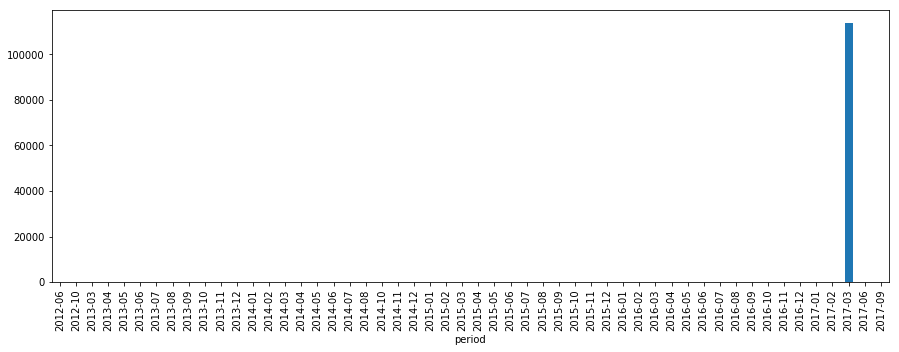

In [18]:
# Now about the visualization. If we set up a chart right away, I'm afraid the result will be somewhat unsatisfying.
import matplotlib.pyplot as plt
%matplotlib inline
ab.code.plot.bar(figsize=[15,5])

In [19]:
# Adjusted chart size right away so the labels are more visible: The subdivision & labeling of the x-axis, which is supposed
# to be a monthly timeline, isn't regular nor correct at all. This is because plenty of months during which no entries were
# created in the database (our US part, that is) are simply lacking. We will therefore reconstitute a complete timeline
# in order to have an x-axis that illustrates correctly the empty time periods.

In [20]:
# Setting up a new monthly PeriodIndex that spans over the whole timeline of our data.
uq=pd.date_range('12-2011', periods=73, freq='M')
uq.to_period('M')

PeriodIndex(['2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05',
             '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11',
             '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05',
             '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11',
             '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05',
             '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11',
             '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05',
             '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11',
             '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05',
             '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11',
             '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05',
             '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
             '2017-12'],
            dtype='period[M

In [21]:
# What will follow is not very slim nor elegant, but it's the *only* way I found out to do it.

In [22]:
# Making it a dataframe, because we'll need to merge it with the 'ab' dataframe later on. In order to merge it with another
# dataframe, it has itself to be a dataframe as well. The PeriodIndex is not the index anymore, and looks different as well.
oq=pd.DataFrame(uq)
oq.columns=['temp']
oq.head()

,temp
0,2011-12-31
1,2012-01-31
2,2012-02-29
3,2012-03-31
4,2012-04-30


In [23]:
# Making the DatetimeIndex the index of the dataframe. For any reason whatsoever, it doesn't look like a PeriodIndex anmyore,
# but like a DatetimeIndex.
oq.set_index('temp',inplace=True)
oq.head()

""
temp
2011-12-31
2012-01-31
2012-02-29
2012-03-31
2012-04-30


In [24]:
# Setting up a new column that is going to be the DatetimeIndex transformed into a PeriodIndex (again). Tried to transform
# the index column of the 'oq' dataframe into a PeriodIndex, but just not worked. No idea why.
oq['period']=oq.index.to_period('M')
oq.head()

,period
temp,
2011-12-31,2011-12
2012-01-31,2012-01
2012-02-29,2012-02
2012-03-31,2012-03
2012-04-30,2012-04


In [25]:
# Reindexing the whole.
oq.reset_index(inplace=True)
oq.head()

,temp,period
0,2011-12-31,2011-12
1,2012-01-31,2012-01
2,2012-02-29,2012-02
3,2012-03-31,2012-03
4,2012-04-30,2012-04


In [26]:
# And defining the newly created PeriodRange column as the index of the dataframe.
# Plenty of unnecessary steps maybe - I tried dozens of time to make it simpler and slimmer, didn't find out.
oq.set_index('period',inplace=True)
oq.head(20)
# Now we have a temporary new dataframe with an PeriodIndex as an index over the whole time span of our timeseries data.

,temp
period,
2011-12,2011-12-31
2012-01,2012-01-31
2012-02,2012-02-29
2012-03,2012-03-31
2012-04,2012-04-30
2012-05,2012-05-31
2012-06,2012-06-30
2012-07,2012-07-31
2012-08,2012-08-31


In [27]:
# We are going to merge the former dataframe 'ab' that counts entries of our database with the newly created dataframe 'oq'.
erp=pd.merge(ab, oq, left_on='period', right_on='period',how='outer')
erp
# We still see lacking months right at the beginning, between 2012-06 and 2012-10, whereas further down, we realize that
# the periods are not sorted: we see months from 2012 after months from 2017.

,created_datetime,code,creator,last_modified_datetime,product_name,brands,countries_en,ingredients_text,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-uk_100g,temp
period,,,,,,,,,,,,,
2012-06,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2012-06-30
2012-10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2012-10-31
2013-03,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2013-03-31
2013-04,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,2013-04-30
2013-05,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2013-05-31
2013-06,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2013-06-30
2013-07,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,2013-07-31
2013-08,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,2013-08-31
2013-09,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2013-09-30


In [28]:
# Sorting all the months again.
erp.sort_values(by=['period'],inplace=True)
erp
# Here we have our dataframe counting the items created each months over the whole timeline of the data, with a reconstructed
# index including all months that had no entries. Why do we want that ? In order to have a chart that reflects better the
# timeline of the created data.

,created_datetime,code,creator,last_modified_datetime,product_name,brands,countries_en,ingredients_text,fat_100g,carbohydrates_100g,proteins_100g,nutrition-score-uk_100g,temp
period,,,,,,,,,,,,,
2011-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31
2012-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-31
2012-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-02-29
2012-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-31
2012-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-04-30
2012-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-05-31
2012-06,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2012-06-30
2012-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-31
2012-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-08-31


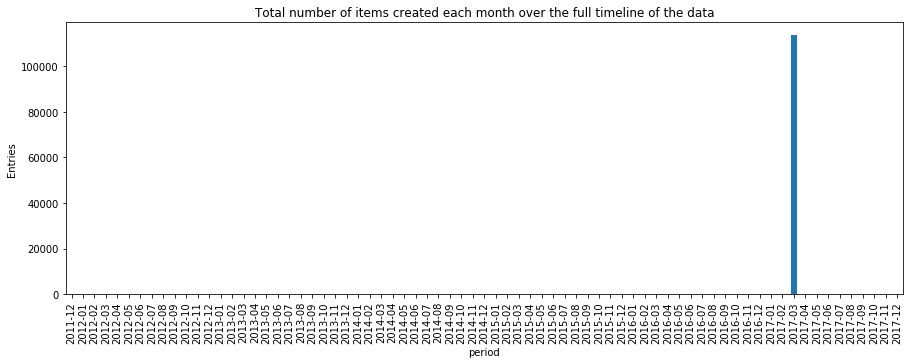

In [29]:
# A vertical monthly bar chart should be the best way to visualize data creation of the full lifetime of the data.
erp.code.plot.bar(figsize=[15,5])
plt.ylabel("Entries")
plt.title("Total number of items created each month over the full timeline of the data")
# It seems that all data has been created in March 2017.

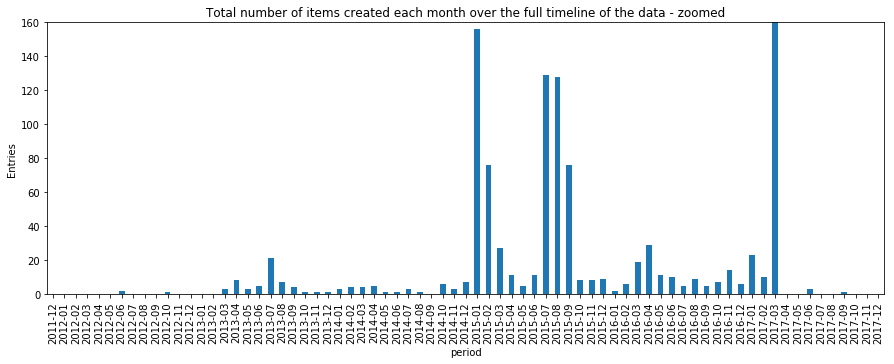

In [34]:
# Since we know that the number of entries in March 2017 were around 160'000 - the biggest part of the dataset we're currently
# working on, let's zoom on a smaller scale to see if there were entries in the other months. And there were.
erp.code.plot.bar(figsize=[15,5])
plt.ylim(0,160)
plt.ylabel("Entries")
plt.title("Total number of items created each month over the full timeline of the data - zoomed")

In [35]:
# End of task C.